In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

### Import train and test data

In [64]:
test = pd.read_csv("test.csv")

In [4]:
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Dealing with missing values 

In [21]:
house.isna().sum(axis=0)
#showing the number of NA values but the data is too big to show up all the columns

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [24]:
# showing the columns with NA values  
nan_cols = [i for i in house.columns if house[i].isna().any()]
nan_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [46]:
na_va=['LotFrontage','Alley', 'MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
j = house[na_va] 
j.isna().sum(axis=0)
# number of NA 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Drop variables with missing valuses more than 1179 since there is more than 80% of missing values in dataset 
#### Therefore, drop Alley, PoolQC, Fence and MiscFeature

In [59]:
house = house.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

## Replace missing values

In [54]:
j.describe(include='all')
# replace numerical data with mean so Lot = 70.049958, MasVnrArea = 103.685262, GarageYrBlt = 1978.506164

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,1201.000000,91,1452,1452.000000,1423,1423,1422,1423,1422,1459,770,1379,1379.000000,1379,1379,1379,7,281,54
unique,NaN,2,4,NaN,4,4,4,6,6,5,5,6,NaN,3,5,5,3,4,4
top,NaN,Grvl,None,NaN,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,NaN,Unf,TA,TA,Gd,MnPrv,Shed
freq,NaN,50,864,NaN,649,1311,953,430,1256,1334,380,870,NaN,605,1311,1326,3,157,49
mean,70.049958,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.506164,NaN,NaN,NaN,NaN,NaN,NaN
std,24.284752,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.689725,NaN,NaN,NaN,NaN,NaN,NaN
min,21.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,59.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,69.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,80.000000,NaN,NaN,166.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
house=house.fillna(house.mean())
# replace the NA with mean in numercial variables 

In [77]:
house_clean = house.apply(lambda x: x.fillna(x.value_counts().index[0]))
# replace missing values with mode values in categorical data

## Data explortary and feature engineering 

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

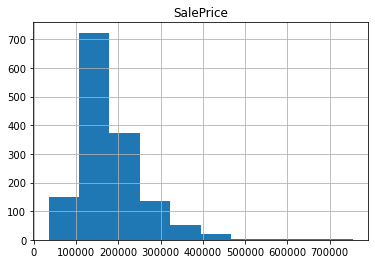

In [85]:
house_clean.hist('SalePrice')
# it is not normal distribution 

### create sale price group based on distribution

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

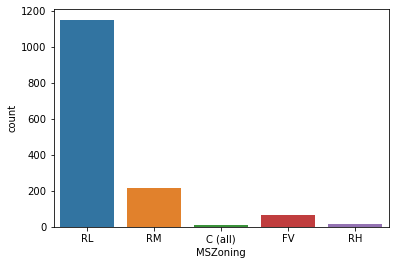

In [84]:
sns.countplot(x='MSZoning',data=house_clean)